In [1]:
!pip install qiskit qiskit-aer

In [2]:
!pip install qiskit qiskit-ibm-runtime matplotlib pylatexenc

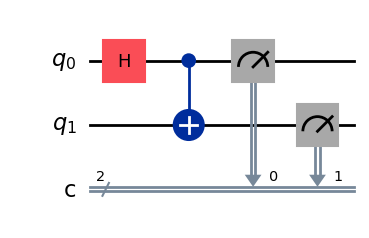

In [3]:
from qiskit import QuantumCircuit

qc=QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
qc.draw('mpl')

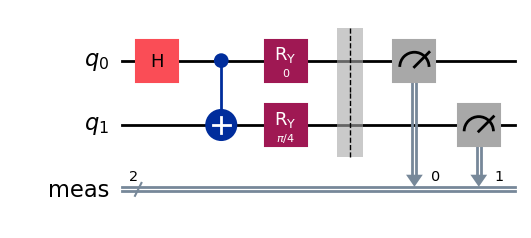

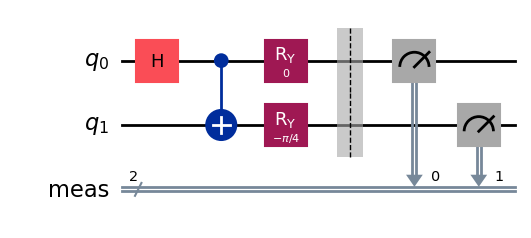

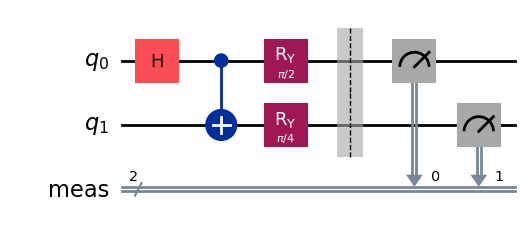

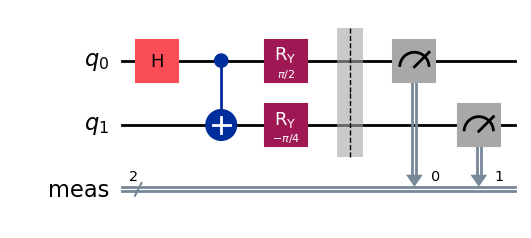

foram criados: 4


In [10]:
from qiskit import QuantumCircuit
import numpy as np

def circuito_chsh(theta_a,theta_b):
  qc=QuantumCircuit(2)
  qc.h(0)
  qc.cx(0,1)
  qc.ry(theta_a,0)
  qc.ry(theta_b,1)

  qc.measure_all()
  return qc
  # crio o entrelasamento quantico e a rotação do eixo y dos qubits


circuitos=[] # onde vou armazenar os circuitos gerados

angulo_alice=[0,np.pi/2] # formula para o calculo do angulo de alice
angulo_bob=[np.pi/4, -np.pi/4] # formula para o calculo do angulo de bob
# criando os circuitos e os armazenandos
for a in angulo_alice:
  for b in angulo_bob:
    qc=circuito_chsh(a,b)
    circuitos.append(qc)
    display(qc.draw('mpl'))


print(f"foram criados: {len(circuitos)}")


In [7]:
def calcular_esperanca(dado):
  # onde vou calcular quando os qubits forem iguais, quando não

    v00 = dado.get('00', 0)
    v11 = dado.get('11', 0)
    v01 = dado.get('01', 0)
    v10 = dado.get('10', 0)

    # aqui realizo a soma dos que deram iguais e onde não deram iguais
    concordam = v00 + v11
    discordam = v01 + v10
    total = concordam + discordam

    media = (concordam - discordam) / total
    # depois tiro a media
    return media

In [8]:
from qiskit_aer import AerSimulator

console=AerSimulator()
trabalho=console.run(circuitos,shorts=1000)
resultado=trabalho.result()

medias=[]

for i in range(4):
  apuracao=resultado.get_counts(i)
  e=calcular_esperanca(apuracao)
  medias.append(e)
  print(f"cenario: {i},media={e}, apuração: {apuracao}")


S=medias[0]+medias[1]+medias[2]-medias[3]

print(f"Resultado {S}")

cenario: 0,media=0.734375, apuração: {'01': 76, '10': 60, '00': 424, '11': 464}
cenario: 1,media=0.708984375, apuração: {'00': 418, '10': 65, '01': 84, '11': 457}
cenario: 2,media=0.68359375, apuração: {'01': 78, '10': 84, '00': 420, '11': 442}
cenario: 3,media=-0.728515625, apuração: {'11': 67, '01': 439, '00': 72, '10': 446}
Resultado 2.85546875
